<a href="https://colab.research.google.com/github/laug80/laug80/blob/main/desafio_v0_cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# notebook: **desafio_v0_cb.ipynb**






In [ ]:
%matplotlib inline
# Instalaremos mglearn, una biblioteca con varias herramientas de visualización interesantes
# que usaremos en otras etapas
!pip install mglearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.9 MB/s eta 0:00:00


## 1) Subir el data set de periodistas
El conjunto de documentos de periodistas está en un archivo compactado (`ofi_opo_UTF_ok.tar.gz`) que debe ser descomprimido (usando los comandos del sistema operativo `gunzip`   y `tar`). Por ello, antes de ejecutar la siguiente celda de código, debe garantizar que esté "cargado" el archivo `ofi_opo_UTF_ok.tar.gz`. Esto lo puede hacer de distintas maneras. Algunas de ellas:

*  "Montando" un directorio (como Google Drive) donde se encuentre este archivo


*  Haciendo un `mget` del archivo desde algún sitio
* "subiéndolo" desde su computadora, usando la facilidad  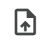  que se encuentra en el panel de **Archivos** a la izquierda de esta notebook. *Sugerencia*: usar esta alternativa por ahora ....

In [ ]:
! gunzip ofi_opo_UTF_ok.tar.gz
! tar -xvf ofi_opo_UTF_ok.tar

./ofi_opo_UTF_ok/
./ofi_opo_UTF_ok/oficialista/
./ofi_opo_UTF_ok/oficialista/jf20.txt
./ofi_opo_UTF_ok/oficialista/jl20.txt
./ofi_opo_UTF_ok/oficialista/sr02.txt
./ofi_opo_UTF_ok/oficialista/jf01.txt
./ofi_opo_UTF_ok/oficialista/jf012.txt
./ofi_opo_UTF_ok/oficialista/jf02.txt
./ofi_opo_UTF_ok/oficialista/jf03.txt
./ofi_opo_UTF_ok/oficialista/jf04.txt
./ofi_opo_UTF_ok/oficialista/jf05.txt
./ofi_opo_UTF_ok/oficialista/jf06.txt
./ofi_opo_UTF_ok/oficialista/jf07.txt
./ofi_opo_UTF_ok/oficialista/jf08.txt
./ofi_opo_UTF_ok/oficialista/jf09.txt
./ofi_opo_UTF_ok/oficialista/jf10.txt
./ofi_opo_UTF_ok/oficialista/jf11.txt
./ofi_opo_UTF_ok/oficialista/jf13.txt
./ofi_opo_UTF_ok/oficialista/jf14.txt
./ofi_opo_UTF_ok/oficialista/jf15.txt
./ofi_opo_UTF_ok/oficialista/jf16.txt
./ofi_opo_UTF_ok/oficialista/jf17.txt
./ofi_opo_UTF_ok/oficialista/jf18.txt
./ofi_opo_UTF_ok/oficialista/jf19.txt
./ofi_opo_UTF_ok/oficialista/jl01.txt
./ofi_opo_UTF_ok/oficialista/jl02.txt
./ofi_opo_UTF_ok/oficialista/jl03.txt
.

Una vez ejecutada la celda anterior, en el directorio local a la notebook quedará el data set ya descompactado `ofi_opo_UTF_ok` que no es más que un **directorio**. Invitamos a que lo recorra en el panel izquierdo. Podrá ver que tiene dos sub-directorios: uno `oficialista` y otro `opositor`, cada uno con los documentos (archivos `.txt`) correspondientes a cada uno de los periodistas

## 2) Cargamos el data set ya descompactado


In [ ]:
from sklearn.datasets import load_files

# Usaremos "load_files" para cargar en memoria los textos de todos los documentos en esos directorios
# Esta función retorna un objeto "Bunch", que no es ni más ni menos que un diccionario, con algunos campos
# especiales. La descripción de esta función se detalla en este link:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html

articulos_corpus = load_files("ofi_opo_UTF_ok",encoding='utf-8')
print("Tipo de lo que devuelve load_files: {}\n".format(type(articulos_corpus)))
print("Claves del objeto Bunch retornado: {}".format(articulos_corpus.keys()))

Tipo de lo que devuelve load_files: <class 'sklearn.utils._bunch.Bunch'>

Claves del objeto Bunch retornado: dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


Como se puede observar, el objeto Bunch retornado tiene varias claves, pero sólo nos concentraremos en 3:


1.   `data`:  Una lista de strings, un string por cada documento presente en alguno de los subdirectorios
2.   `target_names`: Una lista, con los nombres simbólicos de la clase a la que pertenece cada documento. Corresponde al nombre del subdirectorio donde estaba almacenado el documento
3.   `target`: una lista con las etiquetas (numéricas) de la clase a la que pertenece el documento

Veamos algo de lo que contienen


In [24]:
# Veamos el primer documento de la colección. Ese texto está en data[0]
print("Contenido del segundo artículo (data[1]):\n{}\n".format(articulos_corpus.data[1]))

# Veamos el nombre de la clase del primer artículo (target_names[0])
print("Nombre de la clase del segundo artículo (target_names[1]):\n{}".format(articulos_corpus.target_names[0]))

# Y la etiqueta (numérica) de la clase (target[0])
print("Etiqueta (numérica) de la clase del segundo artículo (target[1]):\n{}".format(articulos_corpus.target[0]))


Contenido del segundo artículo (data[1]):
En una entrevista radial, que hoy reprodujo Radio 10, el escritor dio su hipótesis, según el sexo
de la persona, del motivo por el cual "odian o por qué es difícil tolerar a Cristina Fernández de
Kirchner". El argumento fue mechado con giros de un supuesto diálogo imaginario del
intelectual con "una señora o un señor" que está en contra del gobierno nacional.
"Para usted, señora, es difícil tolerar a Cristina, no la
tolera, no la puede ver, no la aguanta más. Usted no sabe si
robó o no, porque lo del patrimonio es una excusa. Usted
la odia. Creo que la odia porque encuentra en ella cosas de
las que usted carece. En lugar de admirarla, cuando una
persona encuentra a otra con las cualidades de la que
carece, puede llenarse de odio, de envidia y resentimiento.
Porque su mera existencia demuestra mi mediocridad, es
la muestra palpable de su mediocridad. La odia o puede
admirarla", afirmó el filósofo kirchnerista.
"Usted la odia a Cristina porque po

Sin embargo, por ahora, sólo usaremos la lista de strings de los documentos y la lista de etiquetas (numéricas) de sus clases. Guardaremos esa información en dos variables: `texto_artic` y `clase_artic`.

In [ ]:
texto_artic, clase_artic = articulos_corpus.data, articulos_corpus.target

## 3) Imprimimos información sobre los datos cargados

In [26]:
print("Tipo of texto_artic: {}".format(type(texto_artic)))
print("Tipo of clase_artic: {}\n".format(type(clase_artic)))
print("Longitud de texto_artic: {}\n".format(len(texto_artic)))

# Contenido del primer artículo (texto_artic[0])
print("Contenido del segundo artículo (texto_artic[1]):\n{}\n".format(texto_artic[1]))
print("Tipo of texto_artic[1]: {}".format(type(texto_artic[1])))

# Longitud del primer artículo (len(texto_artic[0]))
print("Longitud del segundo artículo (len(texto_artic[1])):\n{}\n".format(len(texto_artic[1])))

# Y la clase del primer artículo (clase_artic[0])
print("Clase del segundo artículo (clase_artic[1]):\n{}".format(clase_artic[1]))

print("Tipo of clase_artic[1]: {}".format(type(clase_artic[1])))


Tipo of texto_artic: <class 'list'>
Tipo of clase_artic: <class 'numpy.ndarray'>

Longitud de texto_artic: 196

Contenido del segundo artículo (texto_artic[1]):
En una entrevista radial, que hoy reprodujo Radio  , el escritor dio su hipótesis, según el sexo de la persona, del motivo por el cual "odian o por qué es difícil tolerar a Cristina Fernández de Kirchner". El argumento fue mechado con giros de un supuesto diálogo imaginario del intelectual con "una señora o un señor" que está en contra del gobierno nacional. "Para usted, señora, es difícil tolerar a Cristina, no la tolera, no la puede ver, no la aguanta más. Usted no sabe si robó o no, porque lo del patrimonio es una excusa. Usted la odia. Creo que la odia porque encuentra en ella cosas de las que usted carece. En lugar de admirarla, cuando una persona encuentra a otra con las cualidades de la que carece, puede llenarse de odio, de envidia y resentimiento. Porque su mera existencia demuestra mi mediocridad, es la muestra palpab

## 4) Primera ronda de limpieza de datos

In [40]:
# Aplicar una primera ronda de técnica de limpieza de datos
import re
import string

def clean_text(text):
    '''Convertir a minúscula, remover texto entre corchetes, símbolos de puntuación y palabras que contienen números.'''
    text = text.lower()
    text = re.sub('\r\n', ' ', text)
    text = re.sub('\ufeff', ' ', text)
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

<>:10: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:10: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-154827489.py:10: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', ' ', text)
/tmp/ipython-input-154827489.py:12: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', ' ', text)


In [41]:
texto_artic = [clean_text(doc) for doc in texto_artic]

In [42]:
print("Contenido del segundo artículo (texto_artic[1]):\n{}\n".format(texto_artic[1]))

Contenido del segundo artículo (texto_artic[1]):
en una entrevista radial  que hoy reprodujo radio    el escritor dio su hipótesis  según el sexo de la persona  del motivo por el cual  odian o por qué es difícil tolerar a cristina fernández de kirchner   el argumento fue mechado con giros de un supuesto diálogo imaginario del intelectual con  una señora o un señor  que está en contra del gobierno nacional   para usted  señora  es difícil tolerar a cristina  no la tolera  no la puede ver  no la aguanta más  usted no sabe si robó o no  porque lo del patrimonio es una excusa  usted la odia  creo que la odia porque encuentra en ella cosas de las que usted carece  en lugar de admirarla  cuando una persona encuentra a otra con las cualidades de la que carece  puede llenarse de odio  de envidia y resentimiento  porque su mera existencia demuestra mi mediocridad  es la muestra palpable de su mediocridad  la odia o puede admirarla   afirmó el filósofo kirchnerista   usted la odia a cristina por

## 5) Un vistazo a las palabras de paro (stop words) en español

In [ ]:
#Stop-words (en español, de NLTK)
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

palabras_paro = set(stopwords.words('spanish'))

print("Número de stop words: {}".format(len(palabras_paro)))
#lo comento para no hacerlo extenso
#print("Stop words: {}".format(palabras_paro))
print("Cada 10 stopwords:\n{}".format(list(palabras_paro)[::10]))


Número de stop words: 313
Cada 10 stopwords:
['vosotras', 'estuvierais', 'estuvisteis', 'esas', 'ellos', 'porque', 'estuvo', 'mis', 'tanto', 'estaba', 'más', 'esto', 'sentidos', 'estuve', 'fuéramos', 'hubiéramos', 'serás', 'seamos', 'vosotros', 'sobre', 'estuviste', 'tendrían', 'hubierais', 'muy', 'mí', 'hubieran', 'fuimos', 'seremos', 'siente', 'habremos', 'esté', 'habría']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 6) Un ejemplo de tokenización con el CountVectorizer y textos en español

In [ ]:
documentos = ["pintaron el banco de la plaza",
              "te paso el programa, ejecútalo paso por paso",
              "sentado en el banco, miraba si el banco abría"]

In [ ]:
print(type(documentos))
print(type(documentos[0]))


<class 'list'>
<class 'str'>


### 6.1) Comenzamos tokenizando con palabras como features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect1 = CountVectorizer()
vect1.fit(documentos)

CountVectorizer()

In [ ]:
print("Tamaño de Vocabulario: {}".format(len(vect1.vocabulary_)))
print("Contenido del Vocabulario: {}".format(vect1.vocabulary_))
print("Features: {}".format(vect1.get_feature_names_out()))

Tamaño de Vocabulario: 16
Contenido del Vocabulario: {'pintaron': 9, 'el': 4, 'banco': 1, 'de': 2, 'la': 6, 'plaza': 10, 'te': 15, 'paso': 8, 'programa': 12, 'ejecútalo': 3, 'por': 11, 'sentado': 13, 'en': 5, 'miraba': 7, 'si': 14, 'abría': 0}
Features: ['abría' 'banco' 'de' 'ejecútalo' 'el' 'en' 'la' 'miraba' 'paso'
 'pintaron' 'plaza' 'por' 'programa' 'sentado' 'si' 'te']


### 6.2) Ahora tokenizamos por palabras pero descartando palabras de paro

In [ ]:
vect2 = CountVectorizer(stop_words=list(palabras_paro))
vect2.fit(documentos)

CountVectorizer(stop_words=['vosotras', 'seré', 'algo', 'estés', 'otro', 'tus',
                            'seas', 'en', 'tuvisteis', 'te', 'estuvierais',
                            'estados', 'sentidas', 'los', 'estuvimos',
                            'hubieras', 'tendré', 'estuvieran', 'vuestras',
                            'esos', 'estuvisteis', 'antes', 'estéis', 'habido',
                            'estaremos', 'otra', 'estuviesen', 'habida', 'son',
                            'hubiese', ...])

In [ ]:
print("Tamaño de Vocabulario: {}".format(len(vect2.vocabulary_)))
print("Contenido del Vocabulario: {}".format(vect2.vocabulary_))
print("Features: {}".format(vect2.get_feature_names_out()))

Tamaño de Vocabulario: 10
Contenido del Vocabulario: {'pintaron': 5, 'banco': 1, 'plaza': 6, 'paso': 4, 'programa': 7, 'ejecútalo': 2, 'sentado': 8, 'miraba': 3, 'si': 9, 'abría': 0}
Features: ['abría' 'banco' 'ejecútalo' 'miraba' 'paso' 'pintaron' 'plaza' 'programa'
 'sentado' 'si']


### 6.3) Tokenizamos usando tri-gramas de palabras

In [ ]:
vect3 = CountVectorizer(ngram_range=(3, 3))
vect3.fit(documentos)

CountVectorizer(ngram_range=(3, 3))

In [ ]:
print("Tamaño de Vocabulario: {}".format(len(vect3.vocabulary_)))
print("Contenido del Vocabulario: {}".format(vect3.vocabulary_))
print("Features: {}".format(vect3.get_feature_names_out()))

Tamaño de Vocabulario: 17
Contenido del Vocabulario: {'pintaron el banco': 12, 'el banco de': 5, 'banco de la': 0, 'de la plaza': 2, 'te paso el': 16, 'paso el programa': 10, 'el programa ejecútalo': 7, 'programa ejecútalo paso': 13, 'ejecútalo paso por': 3, 'paso por paso': 11, 'sentado en el': 14, 'en el banco': 8, 'el banco miraba': 6, 'banco miraba si': 1, 'miraba si el': 9, 'si el banco': 15, 'el banco abría': 4}
Features: ['banco de la' 'banco miraba si' 'de la plaza' 'ejecútalo paso por'
 'el banco abría' 'el banco de' 'el banco miraba' 'el programa ejecútalo'
 'en el banco' 'miraba si el' 'paso el programa' 'paso por paso'
 'pintaron el banco' 'programa ejecútalo paso' 'sentado en el'
 'si el banco' 'te paso el']


### 6.4) Tokenizamos usando 4-gramas de caracteres

In [ ]:
vect4 = CountVectorizer(analyzer='char', ngram_range=(4, 4))
vect4.fit(documentos)

CountVectorizer(analyzer='char', ngram_range=(4, 4))

In [ ]:
print("Tamaño de Vocabulario: {}".format(len(vect4.vocabulary_)))
print("Contenido del Vocabulario: {}".format(vect4.vocabulary_))
print("Features: {}".format(vect4.get_feature_names_out()))

Tamaño de Vocabulario: 89
Contenido del Vocabulario: {'pint': 71, 'inta': 45, 'ntar': 59, 'taro': 86, 'aron': 24, 'ron ': 79, 'on e': 68, 'n el': 55, ' el ': 4, 'el b': 39, 'l ba': 48, ' ban': 1, 'banc': 27, 'anco': 23, 'nco ': 56, 'co d': 30, 'o de': 61, ' de ': 2, 'de l': 33, 'e la': 35, ' la ': 6, 'la p': 50, 'a pl': 15, ' pla': 9, 'plaz': 72, 'laza': 51, 'te p': 87, 'e pa': 36, ' pas': 8, 'paso': 70, 'aso ': 25, 'so e': 82, 'o el': 62, 'el p': 40, 'l pr': 49, ' pro': 11, 'prog': 74, 'rogr': 78, 'ogra': 67, 'gram': 43, 'rama': 77, 'ama,': 22, 'ma, ': 53, 'a, e': 17, ', ej': 13, ' eje': 3, 'ejec': 38, 'jecú': 47, 'ecút': 37, 'cúta': 32, 'útal': 88, 'talo': 85, 'alo ': 21, 'lo p': 52, 'o pa': 64, 'so p': 83, 'o po': 65, ' por': 10, 'por ': 73, 'or p': 69, 'r pa': 75, 'sent': 80, 'enta': 42, 'ntad': 58, 'tado': 84, 'ado ': 20, 'do e': 34, 'o en': 63, ' en ': 5, 'en e': 41, 'nco,': 57, 'co, ': 31, 'o, m': 66, ', mi': 14, ' mir': 7, 'mira': 54, 'irab': 46, 'raba': 76, 'aba ': 18, 'ba s':

## 7) Tokenizamos ahora el data set de periodistas

In [ ]:
vect = CountVectorizer()
vect.fit(texto_artic)

CountVectorizer()

In [ ]:
print("Tamaño de Vocabulario: {}".format(len(vect.vocabulary_)))
print("Contenido del Vocabulario: {}".format(vect.vocabulary_))
print("Features: {}".format(vect.get_feature_names_out()))

Tamaño de Vocabulario: 24323
Contenido del Vocabulario: {'el': 8327, 'anuncio': 1548, 'de': 6278, 'la': 13680, 'presidenta': 18269, 'no': 15908, 'es': 9190, 'un': 23288, 'fatalismo': 10322, 'llega': 14144, 'momento': 15324, 'en': 8587, 'que': 18969, 'hay': 11669, 'tomar': 22699, 'decisiones': 6371, 'ojalá': 16328, 'mucha': 15488, 'gente': 11160, 'siga': 21311, 'mismo': 15254, 'camino': 3458, 'tomo': 22716, 'mensaje': 14966, 'dice': 7572, 'dólar': 8187, 'vale': 23453, 'lo': 14236, 'están': 9697, 'diciendo': 7579, 'una': 23289, 'sociedad': 21566, 'puede': 18856, 'comprar': 4719, 'dólares': 8188, 'me': 14833, 'duele': 8123, 'menos': 14964, 'ver': 23662, 'cómo': 6215, 'los': 14299, 'tantas': 22244, 'personas': 17437, 'se': 20960, 'quedaban': 18978, 'sin': 21404, 'trabajo': 22811, 'tengo': 22421, 'repudio': 20018, 'cacerolazos': 3289, 'estamos': 9548, 'año': 2598, 'donde': 8071, 'medios': 14881, 'comunicación': 4785, 'dispuestos': 7897, 'país': 17063, 'incendie': 12399, 'porque': 17940, 'pi